In [6]:
'''
시작하기전..
<(다시) 지도학습> 
1. Linear regression(선형회귀)
    - 단순선형회귀(simple linear regression),
    - 다중선형회귀(multiple linear regression)

2. logistic regression(binary classification; 이항분류)
    지도학습에서 데이터의 label이 0혹은 1로 설정 
    이런 데이터는 기존의 선형회귀 방식으로는 학습하고 예측하는게 불가능 
    (직선으로 표현하기 때문 -> 0과 1로 수렴하지 않음)
    가설을 바꾸자! : H = XW + b(다중선형회귀에서 사용한 가설, 직선)
                  -> 직선이 아닌 0에서 1사이이 값을 가지는 함수로 가설을 표현 

    Email이 spam인지 아닌지를 판별 
    내일의 주가가 오를지 떨어질지를 판별 
    신용카드 사용 시 도난카드인지 아닌지를 판별 
    y lable이 0 혹은 1 (True or False)
    machine learning의 결과는 확률로 나타나요!
    0~1 사이의 값으로 출력 
    일반적으로 0.5 이상이면 1로 간주, 0,5미만이면 0으로 간주 
    ex/ 
    x(시간) → y(성적) 

​     1       →       Fail(0)

​     2       →       Fail(0)

​     5       →       Fail(0)

​     8       →       Pass(1)

​     10      →       Pass(1)

​     20      →       Pass(1)


linear regresssion으로 학습한 후 7시간 공부한 결과를 알아보아요
'''

import tensorflow as tf
x_data = [1,2,5,8,10,20]
y_data = [0,0,0,1,1,1]

x=tf.placeholder(dtype=tf.float32)          
y=tf.placeholder(dtype=tf.float32
             )
W = tf.Variable(tf.random_normal([1]), name ="weight")
b = tf.Variable(tf.random_normal([1]), name ="bias")

H = W * x + b
cost = tf.reduce_mean(tf.square(H-y))

a = tf.Variable(0.0001)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()  
sess = tf.Session() 
sess.run(init)

            
  
for step in range(30001):
    _,cost_val=sess.run([train,cost],  #cost값만 보기 
             feed_dict = {x : x_data,
                          y : y_data})
    if step % 300 ==0:
        print("합격했나? : {}".format(cost_val))
print(sess.run(H, feed_dict = {x: [7]}))







합격했나? : 144.593505859375
합격했나? : 0.11289823055267334
합격했나? : 0.11124637722969055
합격했나? : 0.11045946925878525
합격했나? : 0.10970982164144516
합격했나? : 0.10899561643600464
합격했나? : 0.10831520706415176
합격했나? : 0.10766700655221939
합격했나? : 0.10704944282770157
합격했나? : 0.10646110773086548
합격했나? : 0.1059005931019783
합격했나? : 0.10536660999059677
합격했나? : 0.1048579141497612
합격했나? : 0.10437324643135071
합격했나? : 0.10391151905059814
합격했나? : 0.10347161442041397
합격했나? : 0.1030525490641594
합격했나? : 0.10265330225229263
합격했나? : 0.10227295011281967
합격했나? : 0.10191059112548828
합격했나? : 0.10156535357236862
합격했나? : 0.10123646259307861
합격했나? : 0.10092312097549438
합격했나? : 0.10062462091445923
합격했나? : 0.10034022480249405
합격했나? : 0.1000693067908287
합격했나? : 0.09981119632720947
합격했나? : 0.09956526756286621
합격했나? : 0.09933101385831833
합격했나? : 0.09910782426595688
합격했나? : 0.09889519214630127
합격했나? : 0.0986926332116127
합격했나? : 0.09849963337182999
합격했나? : 0.0983157753944397
합격했나? : 0.09814061969518661
합격했나? : 0.09797374159097672
합

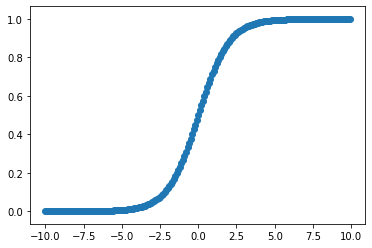

In [9]:
## 로지스틱 회귀분석의 그래프를 그려보자 (시그모이드 함수)
import matplotlib.pyplot as plt
import numpy as np 

x = np.arange(-10, 10, 0.1) # x축은 -10~10범위로  
y = 1/(1 + np.exp(-x)) 

plt.scatter(x,y)



In [17]:
#시그모이드 함수의 비용 그래프는 2차함수 그래프가 아닌 W모양의 형태로 나온다. 
# (2개의 최저점중 더 낮은 쪽이 global minimum, 조금 위에 있는 쪽이 local minimum)
#시작지점에 따라 미분시 local minimum 이 최소값인줄 착각하는 경우가 생길 수 있다. -> cost함수도 변형 필요 
# cost = -ylog(H) - (1-y)log(1-H)

'''
사용할 데이터 
공부시간    어학연수기간    시험성적
  1              1           0(Fail)
  2              0           0(Fail)
  5              1           0(Fail)
  2              3           1(Pass)
  3              3           1(Pass)
  8              1           1(Pass)
  10             0           1(Pass)
'''
import tensorflow as tf 

# training data set 
x_data = [[1,1],
          [2,0],
          [5,1],
          [2,3],
          [3,3],
          [8,1],
          [10,0]]

y_data = [[0],[0],[0],[1],[1],[1],[1]]

#placeholder 
X = tf.placeholder(shape=[None,2], dtype=tf.float32) #7행 2열 이지만 prediction상 문제가 없기위해 None 설정
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias 
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis(변경!)
logit = tf.matmul(X,W) + b #sigmoid 를 이용해서 곡선으로 표현 필요 
H = tf.sigmoid(logit)       # 1 / (1+e-(x))    

# cost function(변경! 일반적으로 tf에서 제공하는 함수를 이용)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, #가설 넣으면 안된다! 
                                                              labels = Y))

# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(3001):
    _,cost_val = sess.run([train,cost],feed_dict ={X: x_data,
                                                    Y: y_data})
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))
#predict
result = sess.run(H, feed_dict={X : [[7,1]]}) #7시간 공부하고 1년정도 어학연수
print(result) #약 0.8, 시험에 통과할 가능성이 아주 큼!

#조건첨가
if result > 0.5:
    print("시험에 통과 : {}".format(result))
else:
    print("시험에 떨어져요 : {}".format(result))




cost값은 : 0.7430952191352844
cost값은 : 0.2825349271297455
cost값은 : 0.22506006062030792
cost값은 : 0.19488665461540222
cost값은 : 0.1749611645936966
cost값은 : 0.16016356647014618
cost값은 : 0.1483990103006363
cost값은 : 0.1386348307132721
cost값은 : 0.13029399514198303
cost값은 : 0.12302332371473312
cost값은 : 0.11659102886915207
[[0.84811276]]
시험에 통과 : [[0.84811276]]


In [62]:
###예제
## 대학원 입학시험 예측 
## admission.csv 참고 (공유폴더)
## logistic regression에선 정확도 측정이 가능하다 
## accuracy -> 95%, 98%이상은 나와야 의미가 있다. 
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 


def change_rank(k):
    if k == 4:
        return 1
    elif k ==3:
        return 2
    elif k ==2:
        return 3
    elif k ==1:
        return 4
    
def process_outlier(tmp_df,tmp):
    q1,q3 = np.percentile(tmp,[25,75])
    iqr = q3 - q1
    upper = q3 + iqr *1.5
    lower = q1 - iqr *1.5
    upper_mask = tmp > upper
    lower_mask = tmp < lower 
    
    result_mask = upper_mask | lower_mask
    return tmp_df[~result_mask]

# 1. data loading(raw data loading)        
df = pd.read_csv("./data/admission.csv")
display(df)
display(df.corr()) #rank와 admit은 음의 상관관계 
                   #rank값을 역순으로 조절해야한다. (4->1, 3->2, 2->3, 1->4)
df["rank"] = df["rank"].apply(lambda x: change_rank(x))
display(df) #바뀐거 확인 

# 2. Data Pre processing(필요데이터 선별, 결측치, 이상치제거)
# 2-1. 필요한 col부터 추출 #다 쓸거기 때문에 불필요 
# df = df[["admit","gre","gpa","rank"]] #(153,2)


# 2-2. 결측치 처리 
df.isnull().sum() #결측치 없음 
#df = df.dropna(how="any", inplace=False) 
#display(df) #결측치 미식별 

'''
# 2-3. 이상치 처리(IRQ기반 : Tukey Fences방식)
#이상치를 제대로 처리하지 않으면 가중치 때문에 학습에 크게 영향을 미칠 수 있다. 
#이상치가 일단 존재하는 지 확인 (boxplot사용)

plt.boxplot(df["gre"]) #하위 이상치 2건 식별 (겹쳐서 정확하진 않음)
plt.boxplot(df["gpa"])  #하위 이상치 1건 식별 (겹쳐서 정확하진 않음)
plt.boxplot(df["rank"]) #이상치 미식별 

# gre, gpa두개만 실시 
#IQR(= 3사분위값 - 1사분위값 )값을 구해서 상위, 하위 이상치의 경계를 계산 
q1,q3 = np.percentile(df["gre"],[25,75]) #tuple로 값을 리턴
iqr = q3-q1 #45.25
lower = q1 - iqr * 1.5 #131.125, 상위이상치를 처리하기 위한 경계값 반환 
mask = df["gre"] < lower #boolean mask 생성, broadcasting을 이용한 필터링 
df = df.loc[~mask] #걸러지지 않은것만 반환

#IQR(= 3사분위값 - 1사분위값 )값을 구해서 상위, 하위 이상치의 경계를 계산 
q1,q3 = np.percentile(df["gpa"],[25,75]) #tuple로 값을 리턴
iqr = q3-q1 #45.25
lower = q1 - iqr * 1.5 #131.125, 상위이상치를 처리하기 위한 경계값 반환 
mask = df["gpa"] < lower #boolean mask 생성, broadcasting을 이용한 필터링 
df = df.loc[~mask] #걸러지지 않은것만 반환
display(df)
'''
# 2-3 이상치 처리(특정 함수를 생성하여 간단하게 하는 법)
#원래는 선언한 함수도 모듈화하여 import 하는 방식으로 해야한다. 
df = process_outlier(df,df["gre"])
df = process_outlier(df,df["gpa"])
df.shape #(400,4) => (395,4)

#2-4. 데이터가 선형적 관계에 있는지 산점도 도시 
#plt.scatter(df["gre"],df["admit"]) #극단 수렴(합불)
#plt.scatter(df["gpa"],df["admit"])  #극단 수렴(합불)
#plt.scatter(df["rank"],df["admit"])  #극단 수렴(합불)


#이번에는 MinMaxScaler를 이용하여 머신러닝 과정에서 정규화할것임
'''
#2-5. 정형화, 혹은 표준화를 이용해서 데이터의 scale변환  
# 정규화(Normalization) = (요소값-최소값) / (최대값 - 최대값)
# => 0~1 사이의 값으로 scale
# 표준화(Standardization) = (요소값-평균) / 표준편차 
# 정규화방식을 이용해서 데이터를 변환 
# 일반적으로는 모듈을 이용(다음시간에..), 우리는 프로그램으로 처리할 것 
df["gre_Norm"] = (df["gre"]-df["gre"].min()) / (df["gre"].max()-df["gre"].min())
df["gpa_Norm"] = (df["gpa"]-df["gpa"].min()) / (df["gpa"].max()-df["gpa"].min())
df["rank_Norm"] = (df["rank"]-df["rank"].min()) / (df["rank"].max()-df["rank"].min())
display(df) #(114,4)

##학습에 적합한 데이터의 완성 
'''


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


,admit,gre,gpa,rank
0,0,380,3.61,2
1,1,660,3.67,2
2,1,800,4.00,4
3,1,640,3.19,1
4,0,520,2.93,1
...,...,...,...,...
395,0,620,4.00,3
396,0,560,3.04,2
397,0,460,2.63,3
398,0,700,3.65,3


,admit,gre,gpa,rank,gre_Norm,gpa_Norm,rank_Norm
0,0,380,3.61,2,0.086957,0.753165,0.333333
1,1,660,3.67,2,0.695652,0.791139,0.333333
2,1,800,4.00,4,1.000000,1.000000,1.000000
3,1,640,3.19,1,0.652174,0.487342,0.000000
4,0,520,2.93,1,0.391304,0.322785,0.000000
...,...,...,...,...,...,...,...
395,0,620,4.00,3,0.608696,1.000000,0.666667
396,0,560,3.04,2,0.478261,0.392405,0.333333
397,0,460,2.63,3,0.260870,0.132911,0.666667
398,0,700,3.65,3,0.782609,0.778481,0.666667


In [67]:
##Machine learning 이어서 
# training data set 
#x_data = df[["gre_Norm","gpa_Norm","rank_Norm"]] 
x_data = df[["gre","gpa","rank"]].values #numpy array로 빠지게 됨 
X_data = MinMaxScaler().fit_transform(x_data)
y_data = df[["admit"]].values.reshape(-1,1)

#placeholder 
X = tf.placeholder(shape=[None,3], dtype=tf.float32) #7행 2열 이지만 prediction상 문제가 없기위해 None 설정
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias 
W = tf.Variable(tf.random_normal([3,1]), name="weight") #placeholder를 참조(편하게 숫자쪽 따오자)
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis(변경!)
logit = tf.matmul(X,W) + b #sigmoid 를 이용해서 곡선으로 표현 필요 
H = tf.sigmoid(logit)       # 1 / (1+e-(x))    

# cost function(변경! 일반적으로 tf에서 제공하는 함수를 이용)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, #가설 넣으면 안된다! 
                                                              labels = Y))

# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train = optimizer.minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(30001):
    _,cost_val = sess.run([train,cost],feed_dict ={X: x_data,
                                                   Y: y_data})
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))

#정확도를 측정해보자(Accuracy)
#현재 test data set이 없다! 
# train data set을 test data set으로 대체 사용 

#predict & accuracy
#특정한 x입력에 대해서 1과 0으로 만들어진 예측값
#학습데이터가 Y데이터와 같다? => 같을 수록 학습이 아주 잘 된 것 
predict = tf.cast(H > 0.5, dtype=tf.float32) #논리연산 : boolean값(T,F)
                                             #casting으로 실수형으로 변환 
correct = tf.equal(predict, Y) #True,False,True,True 이런식으로 나올 것 
                               #  1    0     1    1 
                               #True x4 라면 완벽하게 잘 한 것(평균이 1) 
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 : {}" .format(sess.run(accuracy, feed_dict={X:x_data,
                                                         Y:y_data} ))) #정확도 약 0.7언저리 
                                                                        #훌륭한 데이터셋은 아니다. 
                                                                        #현실적으로 사용할 수 없는 모델 
'''
result = sess.run(H, feed_dict={X : [[520,3.5,3]]}) 
print(result) 

#조건첨가
if result > 0.5:
    print("시험에 통과 : {}".format(result))
else:
    print("시험에 떨어져요 : {}".format(result))
'''

cost값은 : 808.040283203125
cost값은 : 0.6470159292221069
cost값은 : 0.6468926072120667
cost값은 : 0.6467702388763428
cost값은 : 0.6466490626335144
cost값은 : 0.6465281248092651
cost값은 : 0.6464077830314636
cost값은 : 0.646287739276886
cost값은 : 0.646169126033783
cost값은 : 0.6460510492324829
cost값은 : 0.6459339261054993
정확도 : 0.6683544516563416


'\nresult = sess.run(H, feed_dict={X : [[520,3.5,3]]}) \nprint(result) \n\n#조건첨가\nif result > 0.5:\n    print("시험에 통과 : {}".format(result))\nelse:\n    print("시험에 떨어져요 : {}".format(result))\n'

In [64]:
print(x_data)

[[380.     3.61   2.  ]
 [660.     3.67   2.  ]
 [800.     4.     4.  ]
 ...
 [460.     2.63   3.  ]
 [700.     3.65   3.  ]
 [600.     3.89   2.  ]]
